In [59]:
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud,STOPWORDS

In [60]:
file = open("C:/Users/mgk04.DESKTOP-8Q51H2D/Desktop/문재인대통령취임사.txt",'r',encoding='utf-8')
lists = file.readlines()
file.close()
lists

['존경하고 사랑하는 국민여러분. 감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁고, 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.\n',
 '\n',
 '우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다.\n',
 '\n',
 '함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야합니다.\n',
 '\n',
 '존경하는 국민 여러분, 지난 몇 달 우리는 유례없는 정치적 격변기를 겪었습니다. 정치는 혼란스러웠지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다. 전화위복의 기회로 승화시켜 새로운 길을 열었습니다. 우리 국민들은 좌절하지 않고 오히려 이를 전화위복의 계기로 승화시켜 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다.\n',
 '\n',
 '그리고 이번 대통령 선거에서 우리 국민들은 또 다른 역사 만들어주셨습니다. 전국 각지에서 골고른 지지로 새로운 대통령을 만들어주셨습니다. 오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않은 국민 한분 한분도 저의 국민이고, 우리의 섬기겠습니다.\n',
 '\n'

In [61]:
twitter=Twitter()
morphs=[]
for sentence in lists:
    morphs.append(twitter.pos(sentence))
print(morphs)

# morphs=[] 는 morphs라는 빈 리스트를 만들고 그 리스트에 추가한다
# lists에 있는 글의 형태소를 분석한 결과물이다.
# 조사, 명사, 부사 등등 단어와 형태를 나누어 리스트가 형성된다.

C:\Users\mgk04.DESKTOP-8Q51H2D\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('존경', 'Noun'), ('하고', 'Josa'), ('사랑', 'Noun'), ('하는', 'Verb'), ('국민', 'Noun'), ('여러분', 'Noun'), ('.', 'Punctuation'), ('감사합니다', 'Verb'), ('.', 'Punctuation'), ('국민', 'Noun'), ('여러분', 'Noun'), ('의', 'Josa'), ('위대한', 'Adjective'), ('선택', 'Noun'), ('에', 'Josa'), ('머리', 'Noun'), ('숙여', 'Verb'), ('깊이', 'Noun'), ('감사', 'Noun'), ('드립니다', 'Verb'), ('.', 'Punctuation'), ('저', 'Noun'), ('는', 'Josa'), ('오늘', 'Noun'), ('대한민국', 'Noun'), ('19', 'Number'), ('대', 'Verb'), ('대통령', 'Noun'), ('으로서', 'Josa'), ('새로운', 'Adjective'), ('대한민국', 'Noun'), ('을', 'Josa'), ('향', 'Noun'), ('해', 'Verb'), ('첫걸음', 'Noun'), ('을', 'Josa'), ('내딛습니다', 'Verb'), ('.', 'Punctuation'), ('지금', 'Noun'), ('제', 'Noun'), ('두', 'Noun'), ('어깨', 'Noun'), ('는', 'Josa'), ('국민', 'Noun'), ('여러분', 'Noun'), ('으로부터', 'Josa'), ('부여', 'Noun'), ('받은', 'Verb'), ('막중', 'Noun'), ('한', 'Josa'), ('소', 'Modifier'), ('명감', 'Noun'), ('으로', 'Josa'), ('무겁고', 'Adjective'), (',', 'Punctuation'), ('제', 'Noun'), ('가슴', 'Noun'), ('은', 'Josa'), ('한번', 'Noun

In [62]:
# 명사,형용사,부사만 골라내기

In [79]:
noun_adj_adv_list=[]
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun'] and ("제" not in word) and ("저" not in word)and ("대통령" not in word)and ("이"not in word) and("이번"not in word)and("말"not in word) and("것"not in word) and("또" not in word) and("문재인"not in word):
            noun_adj_adv_list.append(word)

print(noun_adj_adv_list)

# 만약(if) tag 안에 명사, 형용사, 부사['Noun','Adjective','Adverb']가 있으면
# 내가 만든 빈 리스트 (noun_adj_adv_list)에 앞의 단어(word)를 추가(append)한다.
  

['존경', '사랑', '국민', '여러분', '국민', '여러분', '선택', '머리', '감사', '오늘', '대한민국', '대한민국', '향', '첫걸음', '지금', '두', '어깨', '국민', '여러분', '부여', '막중', '명감', '가슴', '한번', '경험', '못', '나라', '열정', '지금', '머리', '통합', '공존', '세상', '청사진', '가득', '차', '우리', '대한민국', '숱', '좌절', '패배', '불구', '우리', '선대', '일관', '추구', '나라', '희생', '헌신', '우리', '나라', '대한민국', '만들기', '위해', '역사', '국민', '앞', '겸허', '마음', '대한민국', '책임', '소명', '천명', '선거', '후보', '감사', '위로', '전', '선거', '승자', '패자', '우리', '대한민국', '동반', '경쟁', '순간', '뒤로', '손', '잡고', '앞', '전진', '존경', '국민', '여러분', '지난', '몇', '달', '우리', '유례', '정치', '격변', '정치', '혼란', '국민', '현직', '탄핵', '구속', '앞', '국민', '대한민국', '앞길', '전화위복', '기회', '승화', '길', '우리', '국민', '좌절', '오히려', '전화위복', '계기', '승화', '마침내', '오늘', '세상', '대한민국', '국민', '선거', '우리', '국민', '다른', '역사', '전국', '각지', '골', '지지', '오늘', '국민', '모두', '지지', '국민', '분', '분도', '국민', '우리', '감히', '약속', '날', '국민', '통합', '시작', '날로', '역사', '기록', '존경', '사랑', '국민', '여러분', '지난', '세월', '국민', '바로', '그', '질문', '시작', '오늘', '나라', '구시대', '관행', '과', '감히', '결별', '우선', '권위', '문

In [83]:
count = Counter(noun_adj_adv_list) # 단어수 세기
words = dict(count.most_common(50)) # 가장 많이 등장하는단어(명사)50개
words
# Counter는 위에서 말했듯이 카운팅 해주는 패키지.  
# 이를 내가 만든 최종 리스트(noun_adj_adv_list)에 적용시킨다. 
# 리스트에서 빈도수대로 단어를 정렬(most_common)하고 
# 이를 딕셔너리(dict) 형태로 출력한다.

{'국민': 25,
 '대한민국': 10,
 '여러분': 8,
 '우리': 8,
 '나라': 7,
 '역사': 7,
 '선거': 6,
 '정치': 6,
 '일': 6,
 '존경': 5,
 '오늘': 5,
 '세상': 5,
 '위해': 5,
 '권력': 5,
 '지지': 4,
 '약속': 4,
 '시작': 4,
 '대화': 4,
 '해결': 4,
 '사랑': 3,
 '머리': 3,
 '지금': 3,
 '앞': 3,
 '길': 3,
 '광화문': 3,
 '소통': 3,
 '한반도': 3,
 '평화': 3,
 '갈등': 3,
 '과정': 3,
 '감사': 2,
 '어깨': 2,
 '통합': 2,
 '좌절': 2,
 '마음': 2,
 '동반': 2,
 '지난': 2,
 '탄핵': 2,
 '전화위복': 2,
 '기회': 2,
 '승화': 2,
 '계기': 2,
 '전국': 2,
 '감히': 2,
 '그': 2,
 '시대': 2,
 '직접': 2,
 '시민': 2,
 '기관': 2,
 '안보': 2}

In [84]:
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)

# * wordcloud 패키지도 설치해주어야 한다. 
# (아나콘다 프롬프트에 pip install wordcloud(아니면 WordCloud) 치면 됨) 
# nltk에 대한 설명은 여기서  (형태소 분석 패키지입니다.)

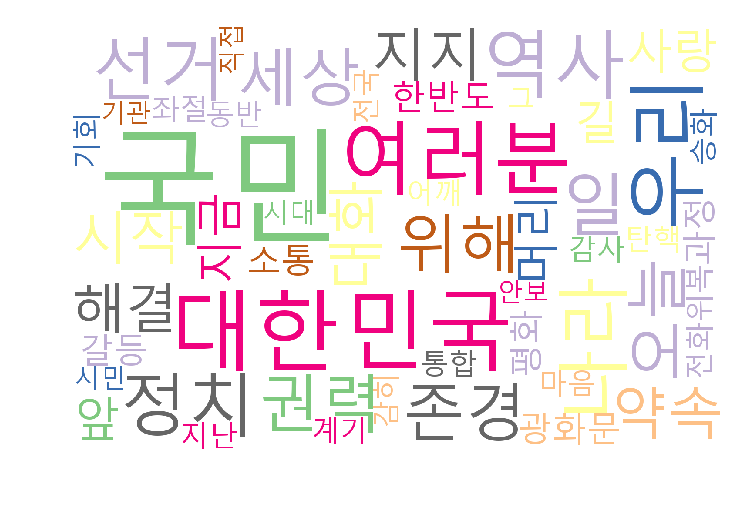

In [85]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# %matplotlib inline 아래 모든 코드는 
# 그래프의 디스플레이에 설정에 관한 것이다.
# font는 Malgun Gothic 
# 그래프가 한글일 경우 선명하게 나오지 않아 선명하게 하기('retina')